In [1]:
import os

import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import cv2
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import os

# 300 x 300
current_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/Rock-Paper-Scissors'
train_dir = os.path.join(current_dir, 'train')
test_dir = os.path.join(current_dir, 'test')
val_dir = os.path.join(current_dir, 'validation')

batch_size = 32
IMG_SHAPE = 224


In [13]:
from google.colab.patches import cv2_imshow

def grayScaleImages(directory):
  image_array = []
  image_label = []
  for item in os.listdir(directory): #assuming gif
    current_dir=os.path.join(directory,item)
    for item1 in os.listdir(current_dir):
      image = cv2.imread(os.path.join(current_dir,item1))
      image = cv2.resize(image, (224,224))
      #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #cv2.imwrite(os.path.join(current_dir,item1), image)
      image_array.append(image)
      image_label.append(item1)
  return np.array(image_array), np.array(image_label)
train_images, train_label = grayScaleImages(train_dir)
val_images, val_label = grayScaleImages(val_dir)
test_images, test_label = grayScaleImages(test_dir)

print(len(train_images))
print(len(val_images))
print(len(test_images))

2520
33
372


In [ ]:
train_images=train_images / 255.0
val_images=val_images / 255.0
test_images = test_images / 255.0

train_images=train_images.reshape(2520, IMG_SHAPE, IMG_SHAPE, 1)
val_images=val_images.reshape(33, IMG_SHAPE, IMG_SHAPE, 1)
test_images=test_images.reshape(372, IMG_SHAPE, IMG_SHAPE, 1)

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_label, validation_data=(val_images, val_label), epochs=20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 dense_8 (Dense)             (None, 20)               

UnimplementedError: ignored

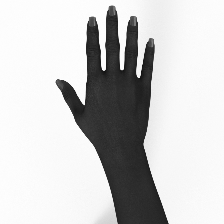

[[253 253 253 ... 252 252 253]
 [253 253 253 ... 252 252 252]
 [253 253 253 ... 252 252 252]
 ...
 [252 252 253 ... 252 251 250]
 [252 253 252 ... 251 251 252]
 [252 253 252 ... 251 252 252]]
tf.Tensor(
[[[253]
  [253]
  [253]
  ...
  [252]
  [252]
  [253]]

 [[253]
  [253]
  [253]
  ...
  [252]
  [252]
  [252]]

 [[253]
  [253]
  [253]
  ...
  [252]
  [252]
  [252]]

 ...

 [[252]
  [252]
  [253]
  ...
  [252]
  [251]
  [250]]

 [[252]
  [253]
  [252]
  ...
  [251]
  [251]
  [252]]

 [[252]
  [253]
  [252]
  ...
  [251]
  [252]
  [252]]], shape=(224, 224, 1), dtype=uint8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


ValueError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
#0 paper, 1 rock, 2 is scissors

#augmented_images = [val_data_gen[0][0][i] for i in range(32)]
#predicted = model.predict_generator(val_data_gen)
#for i in predicted:
  #print(np.argmax(i))
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/Rock-Paper-Scissors/validation/paper/paper-hires1.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
print(image)
image = tf.image.convert_image_dtype(image, dtype = tf.uint8)
image = tf.expand_dims(image, 2)
print(image)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.resize(image, (224,224))
#gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
#edged = cv2.Canny(gray, 30, 200)
#cv2_imshow(edged)
#print(edged.shape)
#rgb_tensor = tf.convert_to_tensor(edged, dtype=tf.float32)
#rgb_tensor = tf.expand_dims(rgb_tensor , 0)
predicted = model.predict_generator(image)
#print(np.argmax(predicted))



In [ ]:
from numpy.random.mtrand import shuffle
image_gen_train = ImageDataGenerator(rescale=1. / 255,
                                         rotation_range=45,
                                         zoom_range=.5,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         brightness_range=(.25, .5),
                                         width_shift_range=.15,
                                         height_shift_range=.15
                                         )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True,
                                                         target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='sparse')

image_gen_val = ImageDataGenerator(rescale=1. / 255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, directory=val_dir, shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='sparse')

image_gen_test = ImageDataGenerator(rescale=1. / 255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size, directory=test_dir, shuffle=True,
                                                       target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='sparse')

Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
steps_per_epoch = train_data_gen.n // batch_size
validation_steps = test_data_gen.n // batch_size
print(train_data_gen.n,test_data_gen.n)

2520 372
